In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")


In [2]:
from langchain_groq import ChatGroq

model = ChatGroq(
    model="qwen/qwen3-32b",
    temperature=0
)


/Users/srishti/Desktop/langchain/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from langchain_tavily import TavilySearch
from langchain.tools import tool

tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
)

@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression: str) -> str:
    return str(eval(expression))


In [4]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=model,
    tools=[tavily_search_tool, calc],
)


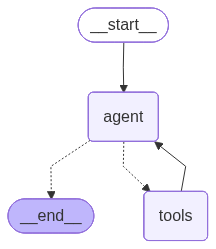

In [5]:
agent


In [8]:
user_input="what is the current Ai news for anthropic and then calculate 5+5"

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

what is the current Ai news for anthropic and then calculate 5+5
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9z02n91zm)
 Call ID: 9z02n91zm
  Args:
    query: current AI news for anthropic
    topic: news
  calculator (n4f9b1ga2)
 Call ID: n4f9b1ga2
  Args:
    expression: 5+5
================================= Tool Message =================================
Name: calculator

10
================================== Ai Message ==================================

Here's the information you requested:

**Current AI News for Anthropic:**
1. **Anthropic Assists NASA's Mars Rover**  
   - Claude helped NASA's Perseverance rover complete a 400-meter drive on Mars (Nov 24, 2025 update).  
   - [Newsroom - Anthropic](https://www.anthropic.com/news)

2. **Anthropic CEO on AI Risks and Regulation**  
   - CEO discusses "powerful" AI risks and the need for

In [9]:
agent.invoke({"messages":"What is the current ai news"})['messages'][-1].content

'Here\'s a summary of the latest AI news from July 1, 2025:\n\n**Major Developments:**\n1. **Microsoft** - Research breakthroughs in using AI for sequential diagnosis of complex medical cases\n2. **Meta** - Strategic shift focusing on superintelligence development\n3. **Google** - Classroom AI updates with Gemini AI tools for education\n4. **Cursor** - Launched web/mobile AI coding editor for managing AI coding agents\n5. **BigBear** - New AI decision intelligence solutions for national security\n6. **Tempus** - Advancing precision medicine through AI healthcare solutions\n\n**Emerging Tools:**\n- Ex-Meta engineers created an AI-powered travel planning tool\n- Freed introduces AI medical scribes for clinical documentation\n- Solvely offers AI educational app with step-by-step problem solving\n\n**Industry Trends:**\n- Anaconda launched "Current News in Generative AI" blog tracking technical advancements and societal impacts\n- Questgen AI now generates real-time news quizzes for educat